# Audio Classification Data Preprocessing

In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='urbansound8k/audio/fold7/104625-4-0-48.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[-0.00941383  0.02041784  0.05229013 ... -0.08863448 -0.07429632
 -0.04866834]


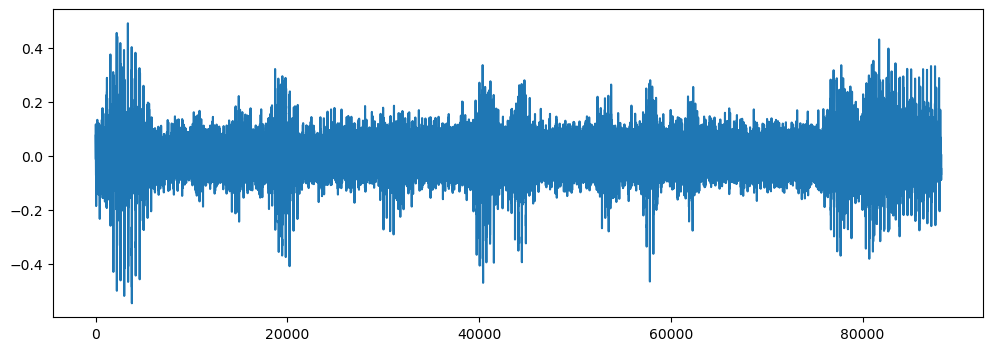

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

# Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[-181144576,   91192320],
       [-180943104,  128070144],
       [-175679488,  167874304],
       ...,
       [ -23593472, -115433984],
       [ -13455872, -101465088],
       [ -14263296,  -90984960]])

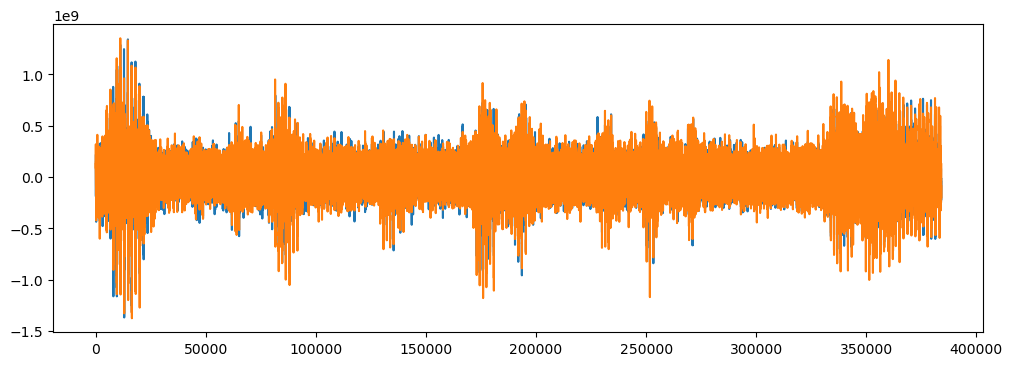

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-1.3317194e+02, -9.3563942e+01, -7.3856873e+01, ...,
        -7.7362350e+01, -7.7674667e+01, -1.0271704e+02],
       [ 6.4038887e+01,  6.4641373e+01,  7.3607628e+01, ...,
         8.5476547e+01,  8.5772926e+01,  8.5574158e+01],
       [-2.6814411e+01, -2.1600952e+01, -9.3929558e+00, ...,
        -1.0772629e+01, -8.9618950e+00, -4.2991858e+00],
       ...,
       [-3.9145763e+00, -9.3051887e-01, -1.0166228e+00, ...,
        -1.2913525e-02,  1.8536069e+00,  4.2035034e-01],
       [-5.1554620e-01,  1.1950059e+00, -4.4984579e-02, ...,
        -1.3768796e+00, -2.4618702e+00, -3.5131736e+00],
       [-2.7240510e+00, -3.6483235e+00, -2.8226120e+00, ...,
        -2.9390317e-01, -3.1122169e+00, -1.3308339e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [07:54,  8.68it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [18:17, 11.46it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [19:07,  7.61it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [20]:
X_train.shape

(6985, 40)

In [21]:
X_test.shape

(1747, 40)

In [22]:
y_train.shape

(6985, 10)

In [23]:
y_test.shape

(1747, 10)

# Model Creation

In [24]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [26]:
### No of classes
num_labels=y.shape[1]

In [27]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [29]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [30]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 9.3612 - accuracy: 0.1014
Epoch 1: val_loss improved from inf to 2.28710, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 4s 8ms/step - loss: 9.3612 - accuracy: 0.1014 - val_loss: 2.2871 - val_accuracy: 0.1128
Epoch 2/100
213/219 [============================>.] - ETA: 0s - loss: 2.4806 - accuracy: 0.1203
Epoch 2: val_loss improved from 2.28710 to 2.27584, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.4756 - accuracy: 0.1215 - val_loss: 2.2758 - val_accuracy: 0.1145
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 2.3236 - accuracy: 0.1158
Epoch 3: val_loss improved from 2.27584 to 2.26956, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.3238 - accuracy: 0.1154 - val_loss: 2.2696 - val_accuracy: 0.1145

219/219 [==============================] - 1s 5ms/step - loss: 1.5281 - accuracy: 0.4587 - val_loss: 1.3369 - val_accuracy: 0.5421
Epoch 26/100
215/219 [============================>.] - ETA: 0s - loss: 1.5316 - accuracy: 0.4526
Epoch 26: val_loss improved from 1.33694 to 1.32828, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.5279 - accuracy: 0.4538 - val_loss: 1.3283 - val_accuracy: 0.5633
Epoch 27/100
216/219 [============================>.] - ETA: 0s - loss: 1.4912 - accuracy: 0.4709
Epoch 27: val_loss improved from 1.32828 to 1.30677, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.4906 - accuracy: 0.4714 - val_loss: 1.3068 - val_accuracy: 0.5484
Epoch 28/100
216/219 [============================>.] - ETA: 0s - loss: 1.4626 - accuracy: 0.4852
Epoch 28: val_loss improved from 1.30677 to 1.24515, saving model to saved_models\audio_classific

219/219 [==============================] - 1s 5ms/step - loss: 1.1539 - accuracy: 0.6097 - val_loss: 0.9756 - val_accuracy: 0.6812
Epoch 52/100
216/219 [============================>.] - ETA: 0s - loss: 1.1607 - accuracy: 0.6011
Epoch 52: val_loss improved from 0.95645 to 0.95058, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.1609 - accuracy: 0.6011 - val_loss: 0.9506 - val_accuracy: 0.6915
Epoch 53/100
217/219 [============================>.] - ETA: 0s - loss: 1.1640 - accuracy: 0.6020
Epoch 53: val_loss did not improve from 0.95058
219/219 [==============================] - 1s 5ms/step - loss: 1.1631 - accuracy: 0.6023 - val_loss: 0.9510 - val_accuracy: 0.6932
Epoch 54/100
215/219 [============================>.] - ETA: 0s - loss: 1.1727 - accuracy: 0.6010
Epoch 54: val_loss did not improve from 0.95058
219/219 [==============================] - 1s 5ms/step - loss: 1.1689 - accuracy: 0.6023 - val_loss: 0.9641 -

219/219 [==============================] - 1s 5ms/step - loss: 1.0657 - accuracy: 0.6419 - val_loss: 0.8756 - val_accuracy: 0.7218
Epoch 80/100
216/219 [============================>.] - ETA: 0s - loss: 1.0440 - accuracy: 0.6473
Epoch 80: val_loss did not improve from 0.86468
219/219 [==============================] - 1s 5ms/step - loss: 1.0432 - accuracy: 0.6477 - val_loss: 0.8813 - val_accuracy: 0.7241
Epoch 81/100
216/219 [============================>.] - ETA: 0s - loss: 1.0412 - accuracy: 0.6427
Epoch 81: val_loss did not improve from 0.86468
219/219 [==============================] - 1s 5ms/step - loss: 1.0403 - accuracy: 0.6434 - val_loss: 0.8700 - val_accuracy: 0.7281
Epoch 82/100
215/219 [============================>.] - ETA: 0s - loss: 1.0149 - accuracy: 0.6564
Epoch 82: val_loss improved from 0.86468 to 0.86027, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.0100 - accuracy: 0.6581 - val_loss: 0.8603 -

In [31]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.72982257604599


In [32]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.162329  ,  -15.153101  ,   -6.604805  ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340122 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.5334608 ,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [33]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

55/55 [==============================] - 0s 2ms/step


In [34]:
filename="urbansound8k/audio/fold7/104625-4-0-48.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predict_x=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(predict_x,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-103.17781      80.47447     -40.345848     39.135036    -26.355986
   13.697237    -16.712542     16.351847    -16.984116     10.878608
  -20.718925      0.65726954  -16.002554      2.0199053   -13.915689
    8.415228     -6.0139675     7.2704077    -7.862784      0.7037462
   -8.578592      3.331038     -7.834696      3.1991255    -1.0259793
    1.7987928    -2.7031538     2.0715322    -7.5418377    -4.387385
   -7.003425      0.27329662   -2.4835927     1.4850001    -6.4711576
   -2.1876853    -3.0887       -0.2222529    -1.8588235    -3.9251997 ]
[[-103.17781      80.47447     -40.345848     39.135036    -26.355986
    13.697237    -16.712542     16.351847    -16.984116     10.878608
   -20.718925      0.65726954  -16.002554      2.0199053   -13.915689
     8.415228     -6.0139675     7.2704077    -7.862784      0.7037462
    -8.578592      3.331038     -7.834696      3.1991255    -1.0259793
     1.7987928    -2.7031538     2.0715322    -7.5418377    -4.387385
    -7.003425      0

array(['drilling'], dtype='<U16')